In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

In [4]:
def read_data():
    df = pd.read_excel(os.path.join('..',settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [5]:
df = read_data()

In [29]:
model = sort_important_features(df)

feature: bio, importance: 0.19780587499681768
feature: ppron, importance: 0.0634552981460136
feature: ipron, importance: 0.038634760226643916
feature: assent, importance: 0.028549924068196262
feature: power, importance: 0.025933300113435483
feature: relig, importance: 0.021328369722659665
feature: i, importance: 0.02010545544190943
feature: you, importance: 0.019615325070712186
feature: sad_2q, importance: 0.018994282291075155
feature: Harm, importance: 0.01895399548871836
feature: work, importance: 0.016994602321797222
feature: affect_1h, importance: 0.016965065641974097
feature: shehe, importance: 0.016104023720656863
feature: feel, importance: 0.01575403638546033
feature: prep, importance: 0.014826453394057196
feature: drives, importance: 0.013719543269922252
feature: tentat, importance: 0.01287030471317675
feature: achieve, importance: 0.011388130018051381
feature: reward, importance: 0.010801739282319919
feature: WPS, importance: 0.01063920420366056
feature: pronoun, importance: 0

In [173]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [ ]:
print_tree(model)

## Random Forest

In [32]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,60))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [33]:
rf, importances, names = sort_important_features(df)

feature: focusfuture, importance: 0.0642856385387769
feature: ppron, importance: 0.06413496945284432
feature: verb, importance: 0.059445261236898764
feature: space, importance: 0.03841585620968509
feature: pronoun, importance: 0.035688685053086686
feature: Fairness, importance: 0.03313132823543997
feature: sad_2q, importance: 0.028393425944794392
feature: we, importance: 0.024990645537249008
feature: relig, importance: 0.02473216276224876
feature: posemo_2h, importance: 0.02218671200198366
feature: posemo_change_q, importance: 0.019805107308479904
feature: auxverb, importance: 0.019550208672652742
feature: i, importance: 0.018861851823534104
feature: power, importance: 0.01852651283905106
feature: ipron, importance: 0.017413360141607832
feature: focuspresent, importance: 0.014591993654573587
feature: achieve, importance: 0.013781137429562603
feature: home, importance: 0.012422909193478524
feature: leisure, importance: 0.011148133511169622
feature: money, importance: 0.01045751282986677

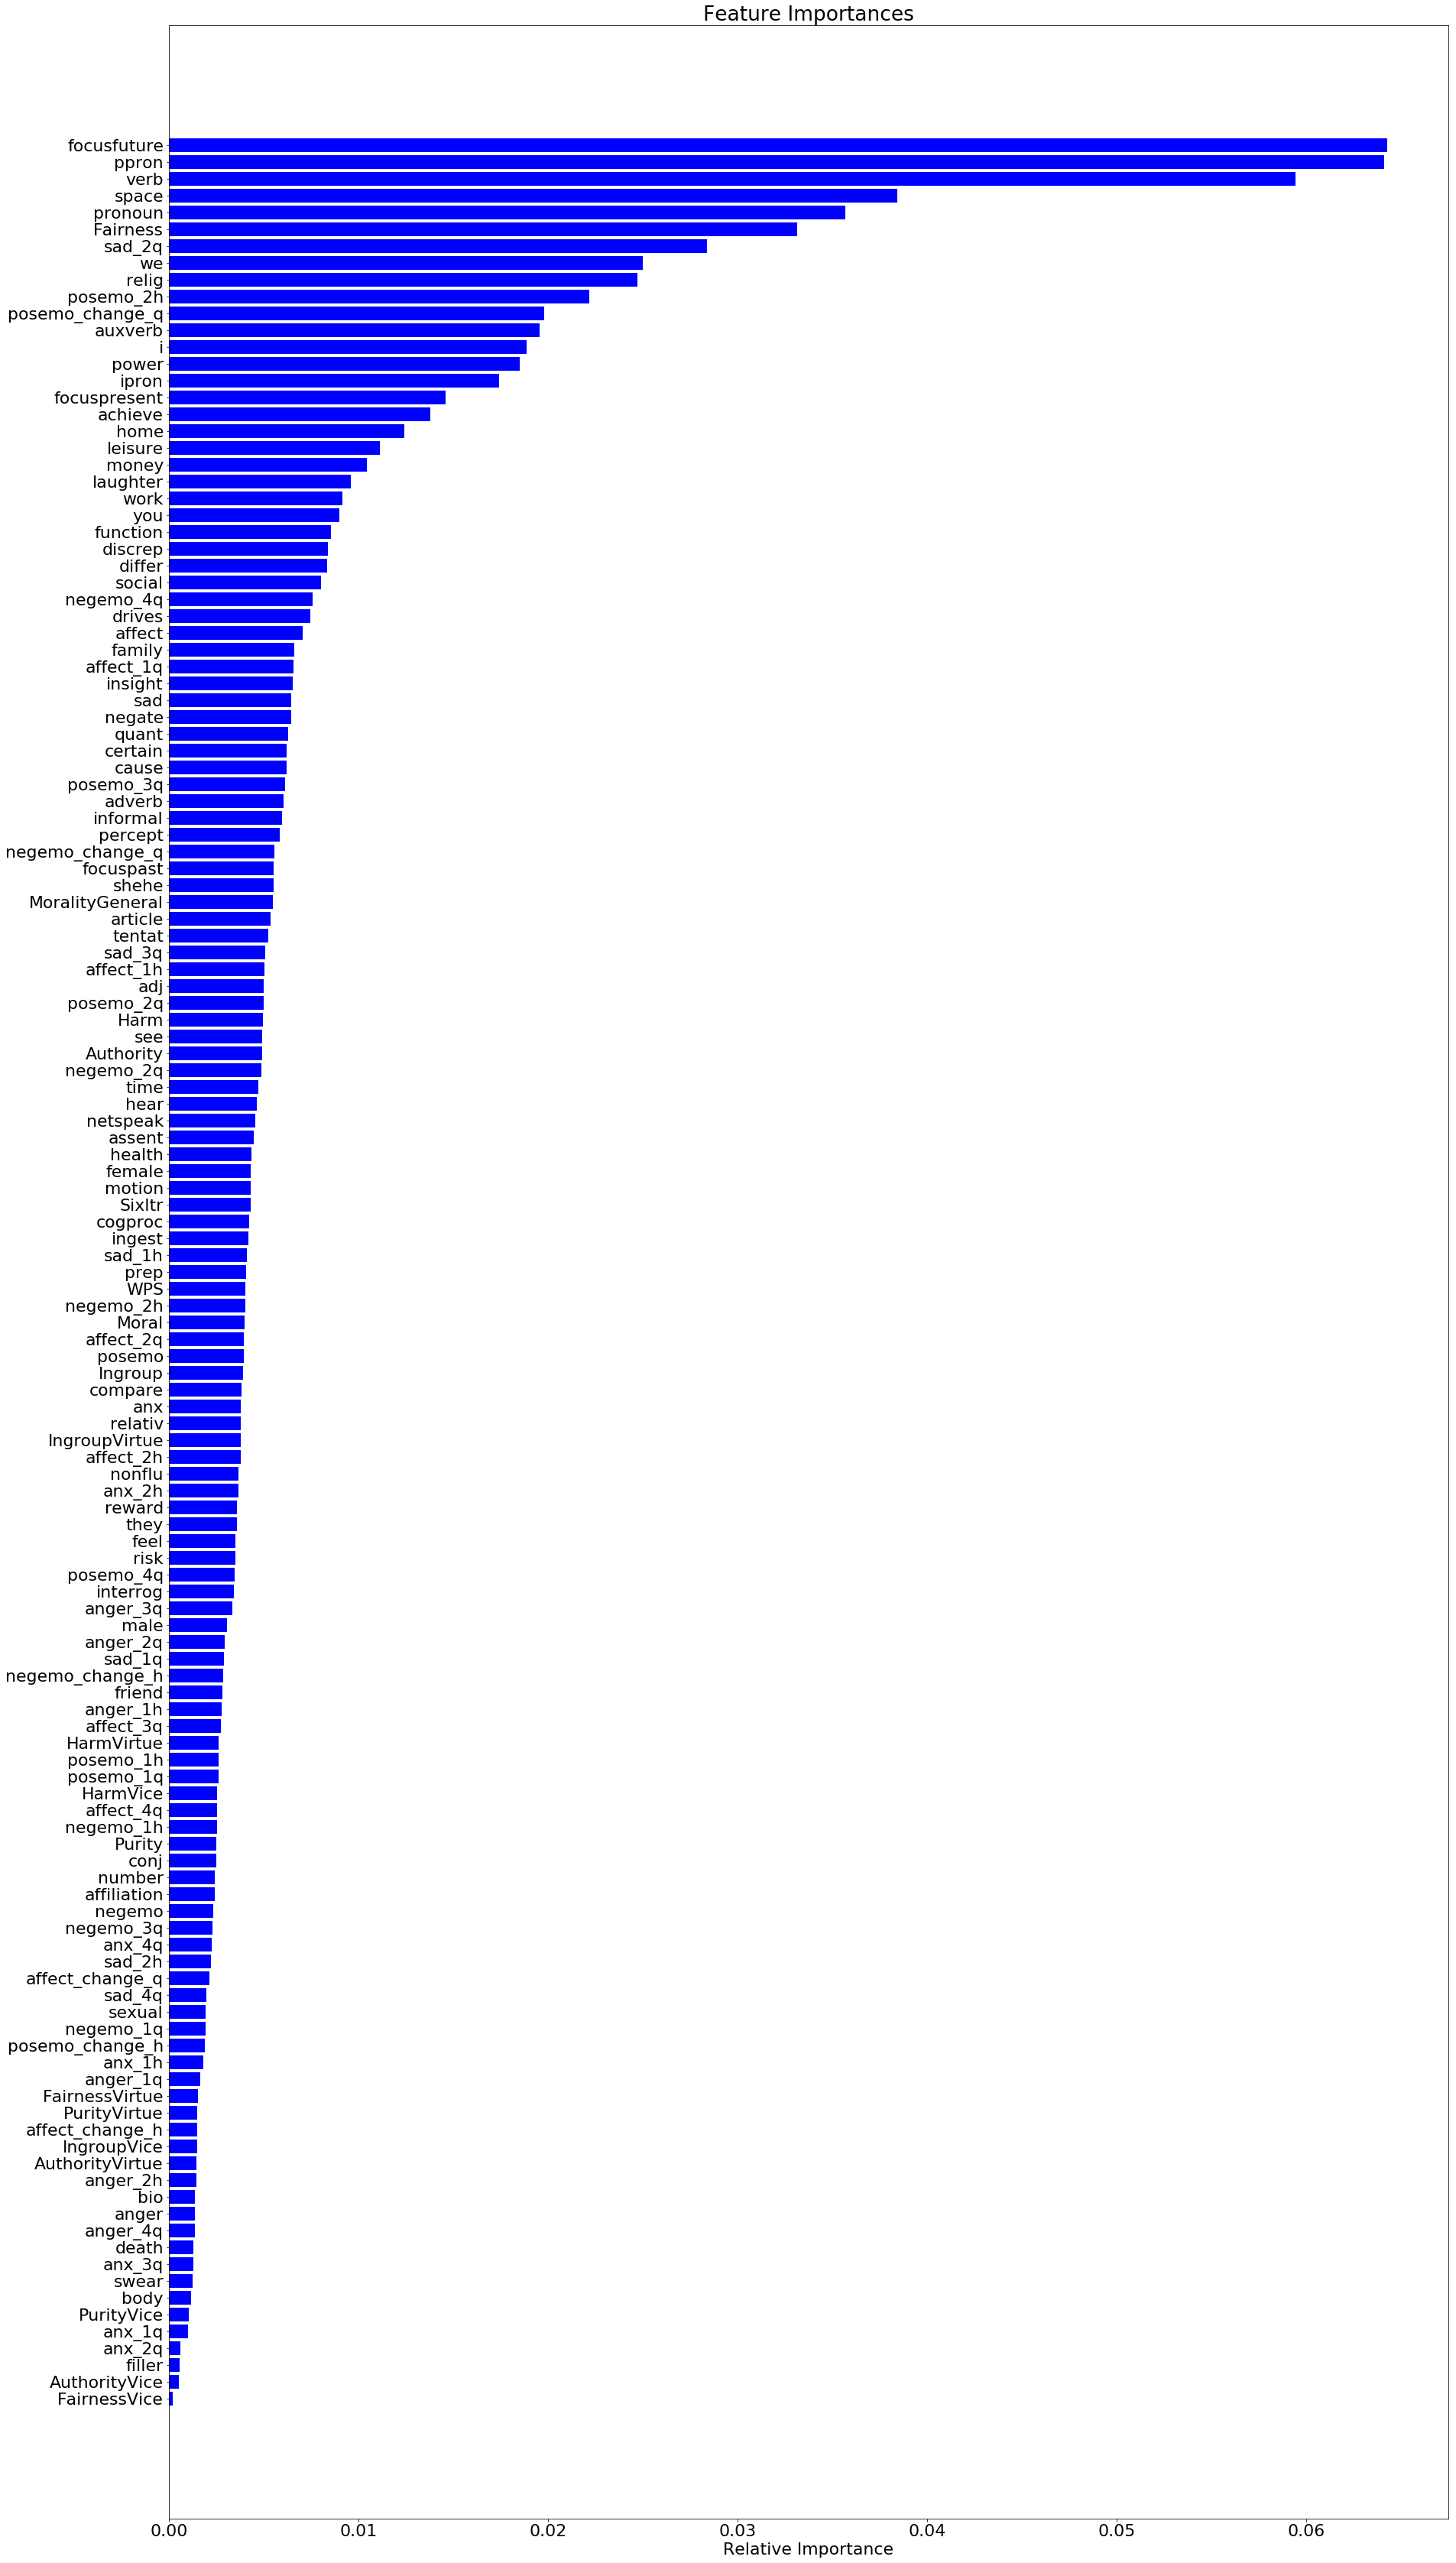

In [35]:

plot_feature_importances(df, importances, names)

## Create Linear Model Using Features with High Importance

In [6]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


def read_data():
    df = pd.read_excel(os.path.join('..',settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['we','i','social','sad_2q','relig','achieve','power', 'focusfuture', ]
    lr.fit(df[predictors], df['norm_inspiring'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_inspiring'], X2)
    est2 = est.fit()
    print(est2.summary())

In [38]:
df = read_data()
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:         norm_inspiring   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     46.68
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           2.30e-62
Time:                        18:18:24   Log-Likelihood:                -16774.
No. Observations:                2406   AIC:                         3.356e+04
Df Residuals:                    2398   BIC:                         3.361e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.3693     25.889     -3.182      0.0